## Overview
* 21卒ユーザー登録者数: 1248
* メールアドレス確認突破人数: 1227
* プロフィール登録突破人数: 1218

![](plot.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker

df = pd.read_csv('21卒学生リスト_-_クリエイティブ職_2020_07_06-v2.csv')
df['resume_count'] = sum([df['skill_count'], df['training_count'], df['portfolio_count']])
df['active_count'] = sum([df['entry_count'], df['intern_count'], df['status_count']])
# df.created_at = pd.to_datetime(df.created_at, utc=True)
# df.index = pd.DatetimeIndex(df.created_at, name="created_at")
# df.index = df.index.tz_convert('Asia/Tokyo')


df.describe()

,public_id,entry_count,intern_count,training_count,status_count,portfolio_count,skill_count,resume_count,active_count
count,7.740000e+02,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,5.173611e+08,0.188630,0.139535,0.857881,0.136951,0.322997,1.466408,2.647287,0.465116
std,2.897232e+08,1.099488,0.592024,2.742122,0.442683,1.228831,3.213536,5.547479,1.604714
min,8.613620e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.722918e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.404208e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.708694e+08,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
max,9.977214e+08,21.000000,8.000000,39.000000,3.000000,15.000000,41.000000,56.000000,23.000000


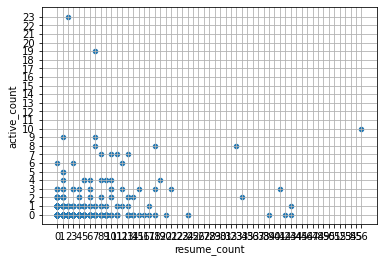

In [2]:
import numpy as np

x = df['resume_count']
y = df['active_count']

plt.scatter(x, y, 20)
plt.xlabel('resume_count')
plt.ylabel('active_count')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))


plt.grid(True)
plt.show()

In [3]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure 
output_notebook()


Loading BokehJS ...

In [4]:
p = figure(plot_width=600, plot_height=600)
p.circle(x=x, y=y, size=8)

p.line([2, 2], [-2, 20], color="red")
p.line([-10, 80], [1, 1], color="red")

p.line([8, 8], [-2, 20], color="red")
p.line([-10, 80], [3, 3], color="red")



show(p)

In [5]:
group_x = df.query('resume_count < 1 and active_count < 1')
group_x.to_csv('group_x.csv')
group_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 10 to 771
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            344 non-null    object
 1   family_name      344 non-null    object
 2   first_name       344 non-null    object
 3   public_id        344 non-null    int64 
 4   last_sign_in_at  26 non-null     object
 5   entry            0 non-null      object
 6   entry_count      344 non-null    int64 
 7   intern           0 non-null      object
 8   intern_count     344 non-null    int64 
 9   training         0 non-null      object
 10  training_count   344 non-null    int64 
 11  contacts         0 non-null      object
 12  status           0 non-null      object
 13  status_count     344 non-null    int64 
 14  希望職種             344 non-null    object
 15  ポートフォリオ          0 non-null      object
 16  portfolio_count  344 non-null    int64 
 17  スキル              0 non-null      o

In [6]:
group_y = df.query('resume_count < 1 and active_count > 0')
group_y.to_csv('group_y.csv')
group_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 42 to 698
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            47 non-null     object
 1   family_name      47 non-null     object
 2   first_name       47 non-null     object
 3   public_id        47 non-null     int64 
 4   last_sign_in_at  0 non-null      object
 5   entry            6 non-null      object
 6   entry_count      47 non-null     int64 
 7   intern           28 non-null     object
 8   intern_count     47 non-null     int64 
 9   training         0 non-null      object
 10  training_count   47 non-null     int64 
 11  contacts         21 non-null     object
 12  status           21 non-null     object
 13  status_count     47 non-null     int64 
 14  希望職種             47 non-null     object
 15  ポートフォリオ          0 non-null      object
 16  portfolio_count  47 non-null     int64 
 17  スキル              0 non-null      ob

In [7]:
group_z = df.query('resume_count > 0 and active_count < 1')
group_z.to_csv('group_z.csv')
group_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 773
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            287 non-null    object
 1   family_name      287 non-null    object
 2   first_name       287 non-null    object
 3   public_id        287 non-null    int64 
 4   last_sign_in_at  57 non-null     object
 5   entry            0 non-null      object
 6   entry_count      287 non-null    int64 
 7   intern           0 non-null      object
 8   intern_count     287 non-null    int64 
 9   training         206 non-null    object
 10  training_count   287 non-null    int64 
 11  contacts         0 non-null      object
 12  status           0 non-null      object
 13  status_count     287 non-null    int64 
 14  希望職種             287 non-null    object
 15  ポートフォリオ          62 non-null     object
 16  portfolio_count  287 non-null    int64 
 17  スキル              165 non-null    ob

In [8]:
group_t = df.query('resume_count > 0 and active_count > 0')
group_t.to_csv('group_t.csv')
group_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 5 to 752
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            96 non-null     object
 1   family_name      96 non-null     object
 2   first_name       96 non-null     object
 3   public_id        96 non-null     int64 
 4   last_sign_in_at  29 non-null     object
 5   entry            44 non-null     object
 6   entry_count      96 non-null     int64 
 7   intern           41 non-null     object
 8   intern_count     96 non-null     int64 
 9   training         72 non-null     object
 10  training_count   96 non-null     int64 
 11  contacts         60 non-null     object
 12  status           60 non-null     object
 13  status_count     96 non-null     int64 
 14  希望職種             96 non-null     object
 15  ポートフォリオ          42 non-null     object
 16  portfolio_count  96 non-null     int64 
 17  スキル              65 non-null     obj